**Task 1**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [4]:
df=pd.read_csv('dataset.csv')

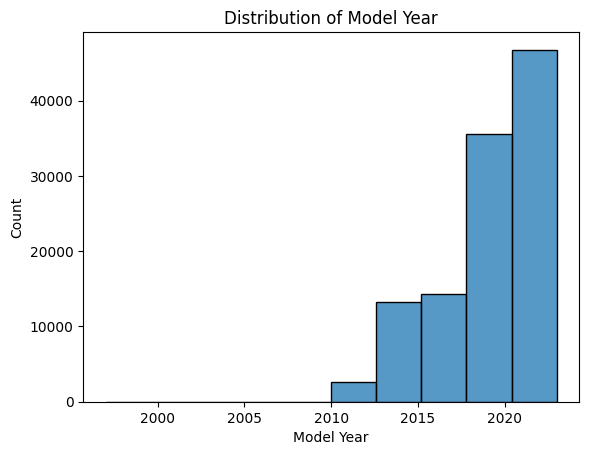

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



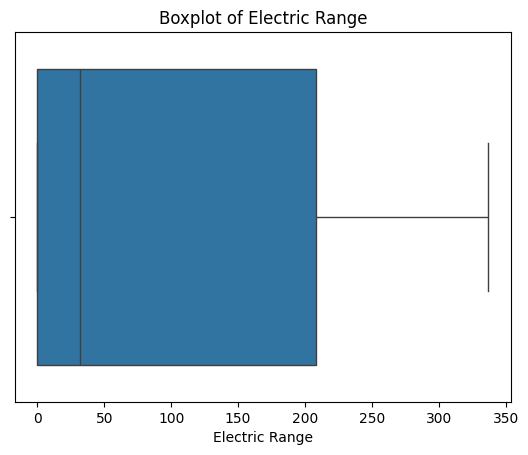

In [29]:
# Univariate Analysis
# Histogram for Model Year
sns.histplot(df['Model Year'], bins=10)
plt.title('Distribution of Model Year')
plt.show()

# Univariate Analysis
# Boxplot for Electric Range
sns.boxplot(x=df['Electric Range'])
plt.title('Boxplot of Electric Range')
plt.show()

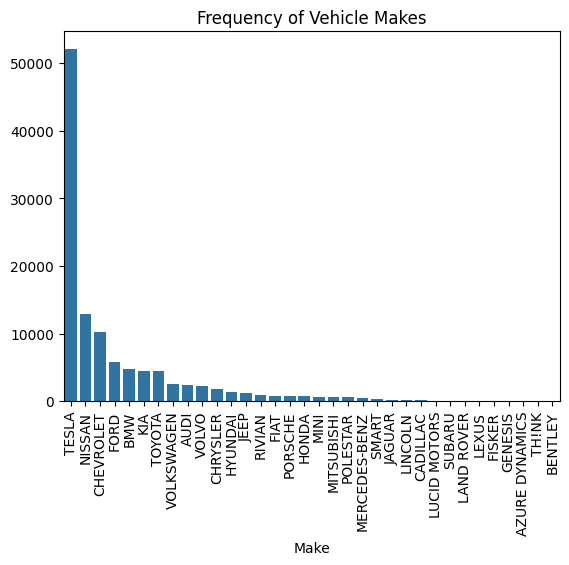

In [6]:
# Bar plot for Make(Car Brands)
# Univariate Analysis
make_counts = df['Make'].value_counts()
sns.barplot(x=make_counts.index, y=make_counts.values)
plt.title('Frequency of Vehicle Makes')
plt.xticks(rotation=90)
plt.show()

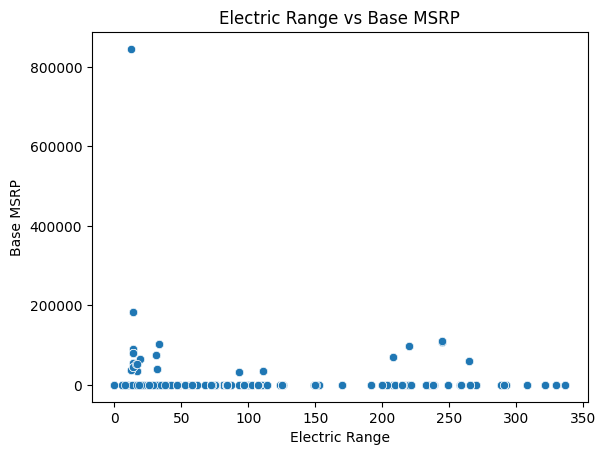

In [7]:
# Bivariate Analysis
# Scatter plot between Electric Range and Base MSRP
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.title('Electric Range vs Base MSRP')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


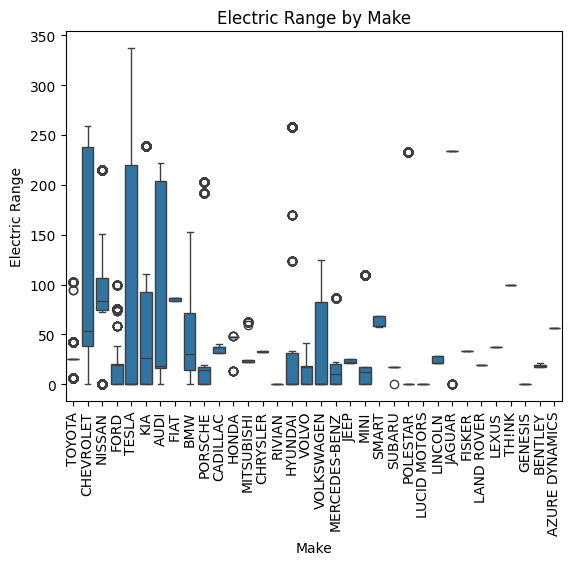

In [8]:
# Bivariate Analysis
#Electric Range and Vehicle Make Boxplot
sns.boxplot(x='Make', y='Electric Range', data=df)
plt.title('Electric Range by Make')
plt.xticks(rotation=90)
plt.show()

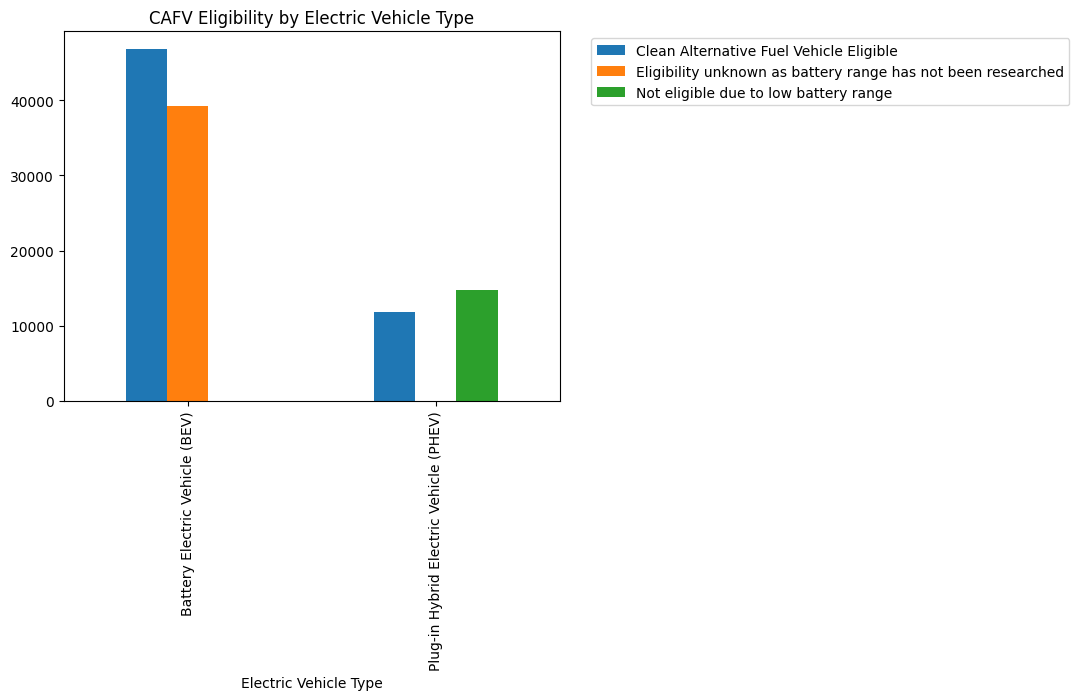

In [9]:
# Cat vs Cat Bivariate Analysis
# Bar Plot for CAFV Eligibility by Electric Vehicle Type
ct=pd.crosstab(df['Electric Vehicle Type'], df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
ax=ct.plot(kind='bar')
plt.title('CAFV Eligibility by Electric Vehicle Type')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Task 2**

In [10]:
ev_location_counts = df.groupby(['Postal Code', 'County', 'Model Year']).size().reset_index(name='EV Count')

In [28]:
fig = px.choropleth_mapbox(ev_location_counts,
                           geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json",
                           locations='Postal Code',
                           color='EV Count',
                           featureidkey="properties.ZCTA5CE10",
                           mapbox_style="carto-positron",
                           zoom=5,
                           center={"lat": 47.7511, "lon": -120.7401},
                           title="Number of EV vehicles based on location Washington Over Time",
                           animation_frame="Model Year",
                           color_continuous_scale="Cividis",
                           hover_data=['EV Count']  # Now this should work
                          )

fig.update_geos(
    showcoastlines=False,
    showland=True,
    fitbounds="locations"
)

fig.show()

**Task 3**

In [12]:
racing_df = df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')
print(racing_df.head())

   Model Year       Make  EV Count
0        1997  CHEVROLET         1
1        1998       FORD         1
2        1999       FORD         3
3        2000       FORD        10
4        2002     TOYOTA         2


In [14]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.9 MB/s eta 0:00:00


In [26]:
import pandas as pd
import bar_chart_race as bcr

# Load your dataset (adjust the path accordingly)
df = pd.read_csv('dataset.csv')

# Group by 'Model Year' and 'Make', and count the number of EVs for each make in each year
df_grouped = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

colors = [
    '#6ECBCE', '#FF2243', '#FFC33D', '#CE9673', '#FFA0FF',
    '#6501E5', '#F79522', '#699AF8', '#34718E', '#00DBCD',
    '#00A3FF', '#F8A737', '#56BD5B', '#D40CE5', '#6936F9',
    '#FF317B', '#0000F3', '#FFA0A0', '#31FF83', '#0556F3'
]

# Create the racing bar plot
bcr.bar_chart_race(
    df=df_grouped,  # DataFrame where each row represents a year, and each column represents a Make
    filename=None,  # None to show the plot in the notebook (or save as 'filename.mp4' to export)
    figsize=(12, 5),  # Size of the figure
    dpi=120,  # Resolution of the figure
    orientation='h',  # Horizontal bars
    sort='desc',  # Sort the bars by descending order
    n_bars=10,  # Number of bars to display (e.g., top 10 EV Makes)
    steps_per_period=45,  # Smoothness of animation
    period_length=1500,  # Time duration (ms) for each period
    title='Electric Vehicles Sales by Make Over the Years',  # Title of the plot
    title_size=30,  # Title font size
    period_label={'x': .95, 'y': .15, 'ha': 'right', 'va': 'center', 'size': 72, 'weight': 'semibold'},  # Period label (e.g., year)
    bar_kwargs={'alpha': .7, 'lw': 0},  # Bar styling (opacity and line width)
)

Output hidden; open in https://colab.research.google.com to view.